In [38]:

import pandas as pd

import numpy as np
import itertools
import category_encoders as ce

from numpy import mean
from numpy import std
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [39]:
#df = pd.read_csv('bank updated.csv')              Old .csv with numeric pdays.

df = pd.read_csv('bank updated categories.csv')

col_names = ['age', 
             'job', 
             'martial', 
             'education', 
             'cred_in_default', 
             'balance',
             'housing',
             'loan',
             'contact',
             'last_contact_day',
             'last_contact_month',
             'last_contact_dur',
             'num_of_contacts_during_campaign',
             'past_days',
             'prev_contacts',
             'prev_outcome',
             'sub_term_deposit']
df.columns = col_names

# Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f'\nTotal duplicate rows: {duplicate_count}')

df.head()


Total duplicate rows: 0


,age,job,martial,education,cred_in_default,balance,housing,loan,contact,last_contact_day,last_contact_month,last_contact_dur,num_of_contacts_during_campaign,past_days,prev_contacts,prev_outcome,sub_term_deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,No Contact,0,unknown,no
1,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,No Contact,0,unknown,no
2,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,No Contact,0,unknown,no
3,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,No Contact,0,unknown,no
4,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,No Contact,0,unknown,no


In [40]:
print("Bank data set dimensions (observations, features): {}".format(df.shape))
print("\n\nsummary statistics of the dataset:\n\n", df.describe())


Bank data set dimensions (observations, features): (4521, 17)


summary statistics of the dataset:

                age       balance  last_contact_day  last_contact_dur  \
count  4521.000000   4521.000000       4521.000000       4521.000000   
mean     41.170095   1422.657819         15.915284        263.961292   
std      10.576211   3009.638142          8.247667        259.856633   
min      19.000000  -3313.000000          1.000000          4.000000   
25%      33.000000     69.000000          9.000000        104.000000   
50%      39.000000    444.000000         16.000000        185.000000   
75%      49.000000   1480.000000         21.000000        329.000000   
max      87.000000  71188.000000         31.000000       3025.000000   

       num_of_contacts_during_campaign  prev_contacts  
count                      4521.000000    4521.000000  
mean                          2.793630       0.542579  
std                           3.109807       1.693562  
min                       

In [41]:
print("Bank data set dimensions : {}".format(df.shape))

Bank data set dimensions : (4521, 17)


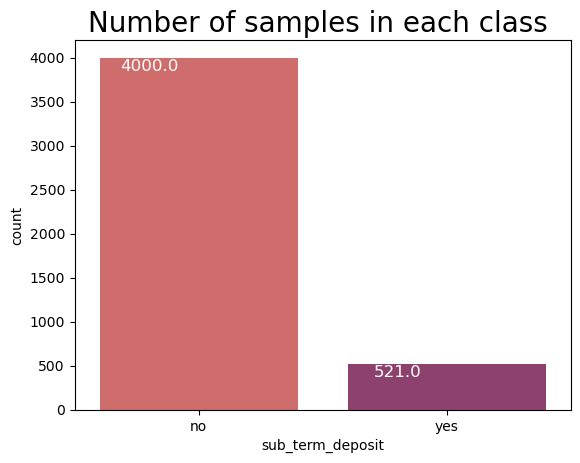

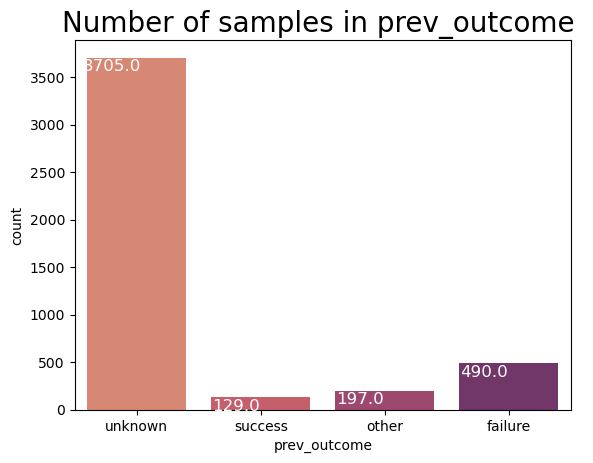

In [42]:
ax = sns.countplot(x="sub_term_deposit", data=df, palette="flare")
ax.set_title('Number of samples in each class ', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='center', color='white', size=12)
plt.show()

ax = sns.countplot(x="prev_outcome", data=df, palette="flare")
ax.set_title('Number of samples in prev_outcome ', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='center', color='white', size=12)
plt.show()

last_contact_month  apr  aug  dec  feb  jan  jul  jun  mar   may  nov  oct  \
sub_term_deposit                                                             
no                  237  554   11  184  132  645  476   28  1305  350   43   
yes                  56   79    9   38   16   61   55   21    93   39   37   

last_contact_month  sep  
sub_term_deposit         
no                   35  
yes                  17  
job               admin.  blue-collar  entrepreneur  housemaid  management  \
sub_term_deposit                                                             
no                   420          877           153         98         838   
yes                   58           69            15         14         131   

job               retired  self-employed  services  student  technician  \
sub_term_deposit                                                          
no                    176            163       379       65         685   
yes                    54             20     

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No Contact'),
  Text(1, 0, 'Under 100'),
  Text(2, 0, 'Under 200'),
  Text(3, 0, 'Under 300'),
  Text(4, 0, 'Under 400'),
  Text(5, 0, 'Under 500'),
  Text(6, 0, 'Under 600'),
  Text(7, 0, 'Under 700'),
  Text(8, 0, 'Under 800'),
  Text(9, 0, 'Under 900')])

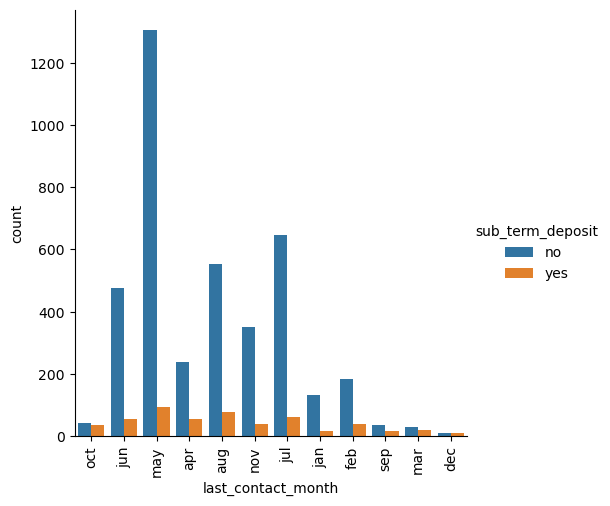

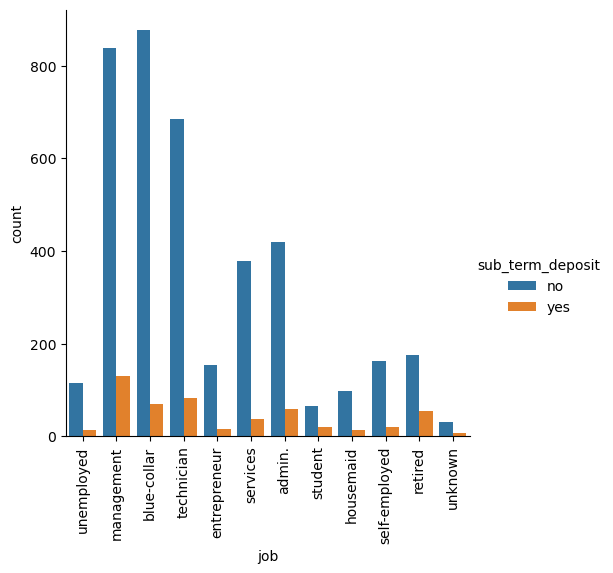

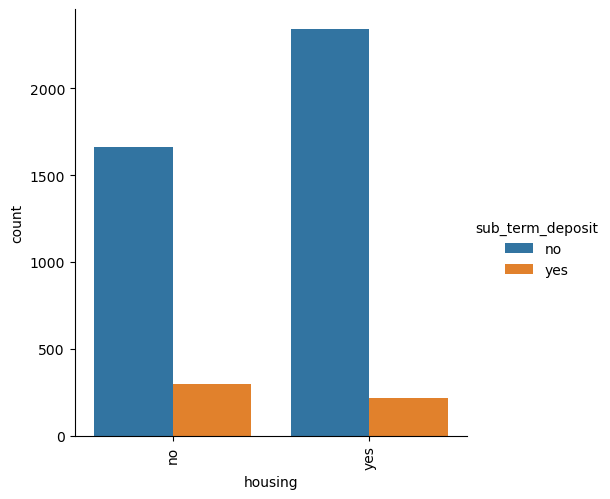

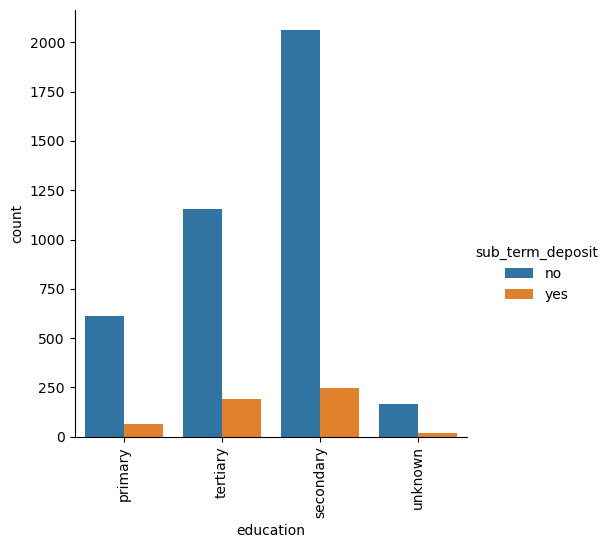

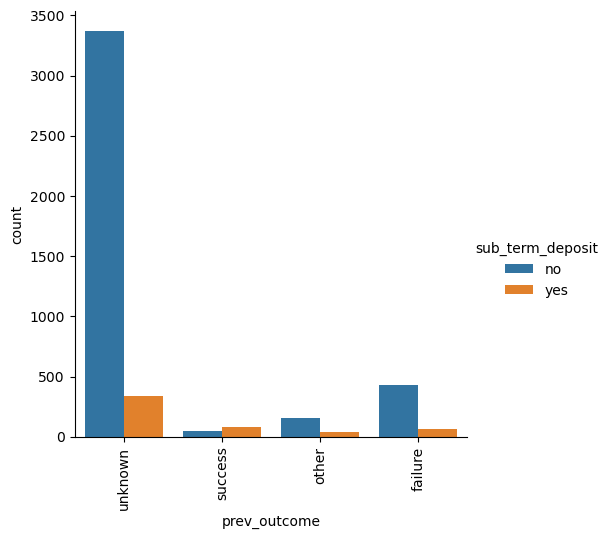

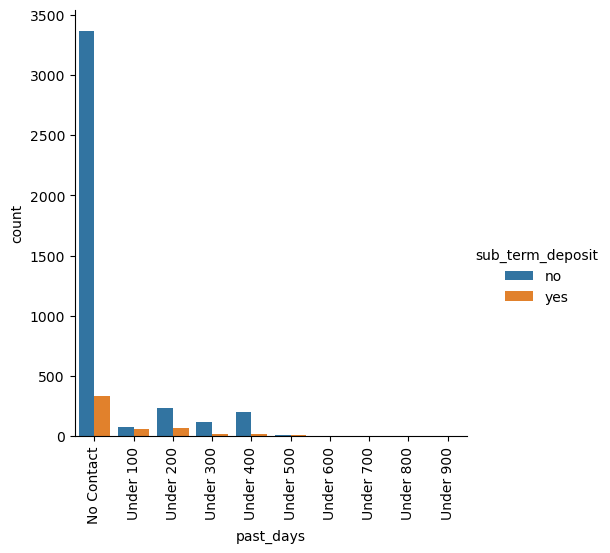

In [50]:
print(pd.crosstab(df['sub_term_deposit'], df.last_contact_month))
sns.catplot(data=df, x='last_contact_month', hue='sub_term_deposit', kind="count")
plt.xticks(rotation=90)

print(pd.crosstab(df['sub_term_deposit'], df.job))
sns.catplot(data=df, x='job', hue='sub_term_deposit', kind="count")
plt.xticks(rotation=90)

print(pd.crosstab(df['sub_term_deposit'], df.housing))
sns.catplot(data=df, x='housing', hue='sub_term_deposit', kind="count")
plt.xticks(rotation=90)

print(pd.crosstab(df['sub_term_deposit'], df.education))
sns.catplot(data=df, x='education', hue='sub_term_deposit', kind="count")
plt.xticks(rotation=90)

print(pd.crosstab(df['sub_term_deposit'], df.prev_outcome))
sns.catplot(data=df, x='prev_outcome', hue='sub_term_deposit', kind="count")
plt.xticks(rotation=90)

print(pd.crosstab(df['sub_term_deposit'], df.prev_outcome))
sns.catplot(data=df, x='past_days', hue='sub_term_deposit', kind="count")
plt.xticks(rotation=90)


In [44]:

X = df[['age', 
             'job', 
             'martial', 
             'education', 
             'cred_in_default', 
             'balance',
             'housing',
             'loan',
             'contact',
             'last_contact_day',
             'last_contact_month',
             'last_contact_dur',
             'num_of_contacts_during_campaign',
             'past_days',
             'prev_contacts',
             'prev_outcome']]
y = df[['sub_term_deposit']]
nrows, ncols = df.shape

encoder = ce.OrdinalEncoder(cols=['age', 
             'job', 
             'martial', 
             'education', 
             'cred_in_default', 
             'balance',
             'housing',
             'loan',
             'contact',
             'last_contact_day',
             'last_contact_month',
             'last_contact_dur',
             'num_of_contacts_during_campaign',
             'past_days',
             'prev_contacts',
             'prev_outcome'])
X_enc = encoder.fit_transform(X)

# Split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.3, random_state=2)

Feature scores using Chi-square:  

Feature 0: 72.976600
Feature 1: 19.333078
Feature 2: 3.278516
Feature 3: 0.510517
Feature 4: 0.002712
Feature 5: 10327.569276
Feature 6: 4.429535
Feature 7: 1.627102
Feature 8: 7.153938
Feature 9: 17.548908
Feature 10: 17.123064
Feature 11: 20287.421219
Feature 12: 51.683905
Feature 13: 24.648984
Feature 14: 124.669797
Feature 15: 12.357461


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'job'),
  Text(2, 0, 'martial'),
  Text(3, 0, 'education'),
  Text(4, 0, 'cred_in_default'),
  Text(5, 0, 'balance'),
  Text(6, 0, 'housing'),
  Text(7, 0, 'loan'),
  Text(8, 0, 'contact'),
  Text(9, 0, 'last_contact_day'),
  Text(10, 0, 'last_contact_month'),
  Text(11, 0, 'last_contact_dur'),
  Text(12, 0, 'num_of_contacts_during_campaign'),
  Text(13, 0, 'past_days'),
  Text(14, 0, 'prev_contacts'),
  Text(15, 0, 'prev_outcome')])

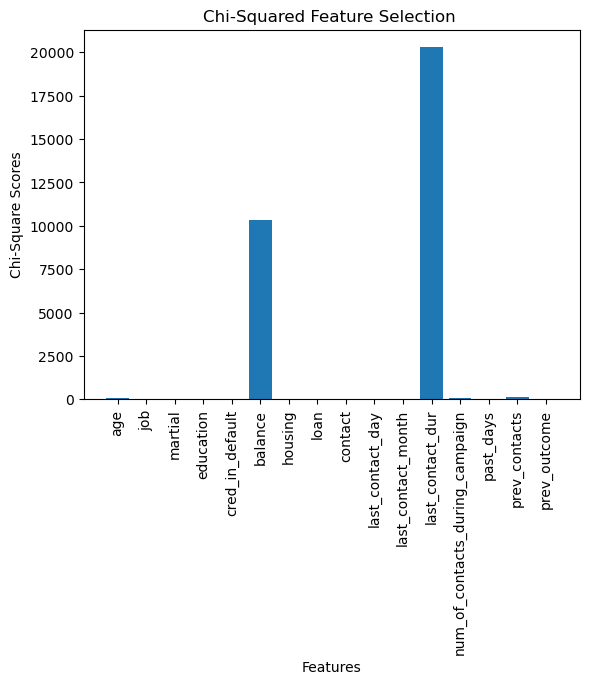

In [45]:
# Chi-squared feature selection
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

# Scores for each feature
print('Feature scores using Chi-square: ','\n')
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# Plot scores
labels = ['age', 
             'job', 
             'martial', 
             'education', 
             'cred_in_default', 
             'balance',
             'housing',
             'loan',
             'contact',
             'last_contact_day',
             'last_contact_month',
             'last_contact_dur',
             'num_of_contacts_during_campaign',
             'past_days',
             'prev_contacts',
             'prev_outcome']
fig, ax = plt.subplots()
ax.set_xlabel("Features")
ax.set_ylabel("Chi-Square Scores")
ax.set_title("Chi-Squared Feature Selection ")
plt.bar([i for i in range(len(fs.scores_))], fs.scores_,tick_label=labels)
plt.xticks(rotation=90)

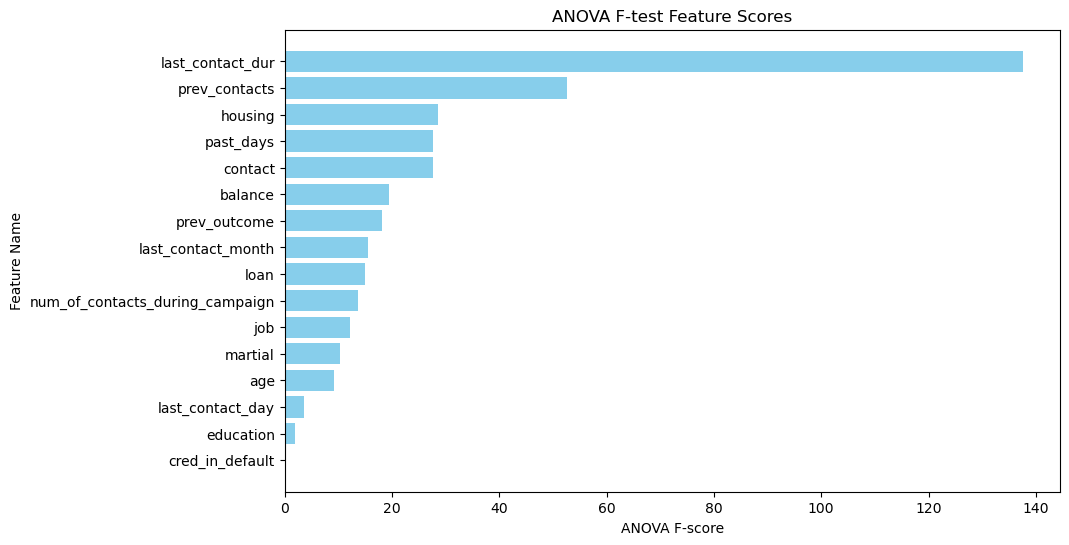

                            Feature       Score
11                 last_contact_dur  137.557816
14                    prev_contacts   52.653996
6                           housing   28.640575
13                        past_days   27.723391
8                           contact   27.688587
5                           balance   19.540159
15                     prev_outcome   18.186281
10               last_contact_month   15.622652
7                              loan   15.062254
12  num_of_contacts_during_campaign   13.704258
1                               job   12.150524
2                           martial   10.363489
0                               age    9.147933
9                  last_contact_day    3.528203
3                         education    1.965069
4                   cred_in_default    0.169241


In [46]:
#Original
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
import matplotlib.pyplot as plt

# ANOVA FEATURE SELECTION
# Ranking of all features based on ANOVA F-scores
fs = SelectKBest(score_func=f_classif, k='all') 
fs.fit(X_train, y_train)

# Create a DataFrame to store feature scores
fs_score_df = pd.DataFrame({'Feature': X_train.columns, 'Score': fs.scores_})

# Sort feature scores in descending order
fs_score_df = fs_score_df.sort_values(by='Score', ascending=False)

# Plot feature scores
feature_name = fs_score_df['Feature']
scores = fs_score_df['Score']

plt.figure(figsize=(10, 6))
plt.barh(feature_name, scores, color='skyblue')
plt.xlabel('ANOVA F-score')
plt.ylabel('Feature Name')
plt.title('ANOVA F-test Feature Scores')
plt.gca().invert_yaxis()
plt.show()

# Display feature ranking based on ANOVA feature selection
print(fs_score_df)

In [47]:
df_test = df.drop(['job','martial','education'], axis=1)

In [48]:
#Task 6 Data Prepration



# Set the input (X) and output/target (y) 
X = df_test.iloc[:, 1:13].values 
y = df_test.iloc[:, 13].values

#Encoding categorical data values
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

age                                 int64
job                                object
martial                            object
education                          object
cred_in_default                    object
balance                             int64
housing                            object
loan                               object
contact                            object
last_contact_day                    int64
last_contact_month                 object
last_contact_dur                    int64
num_of_contacts_during_campaign     int64
past_days                          object
prev_contacts                       int64
prev_outcome                       object
sub_term_deposit                   object
dtype: object


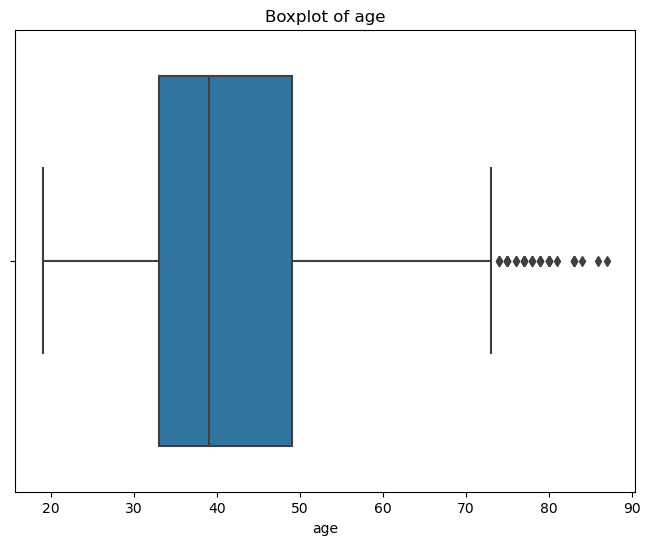

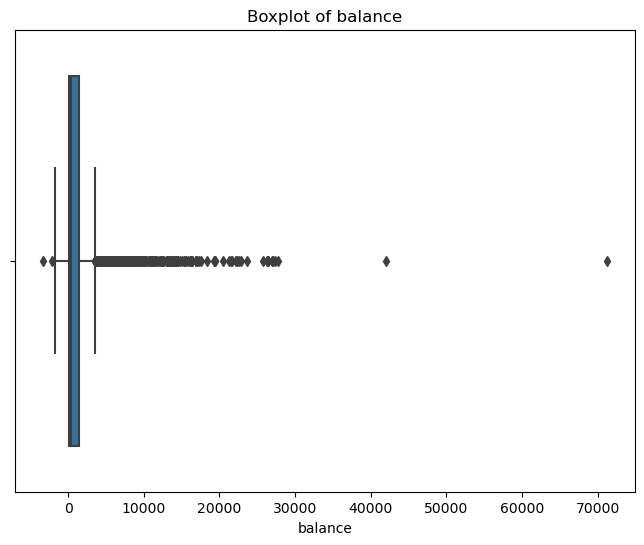

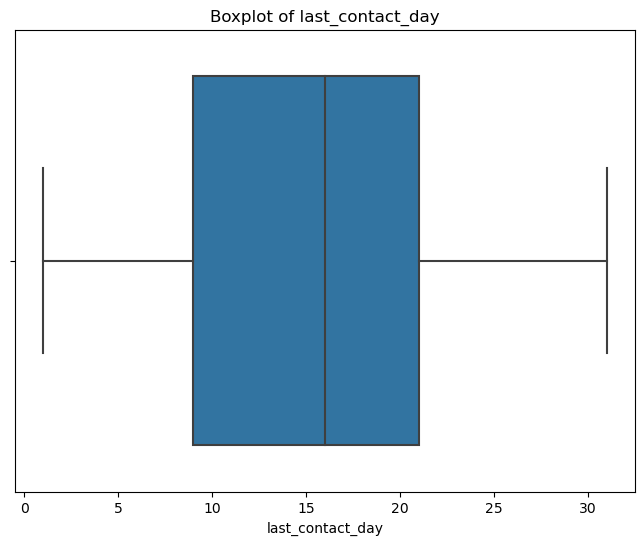

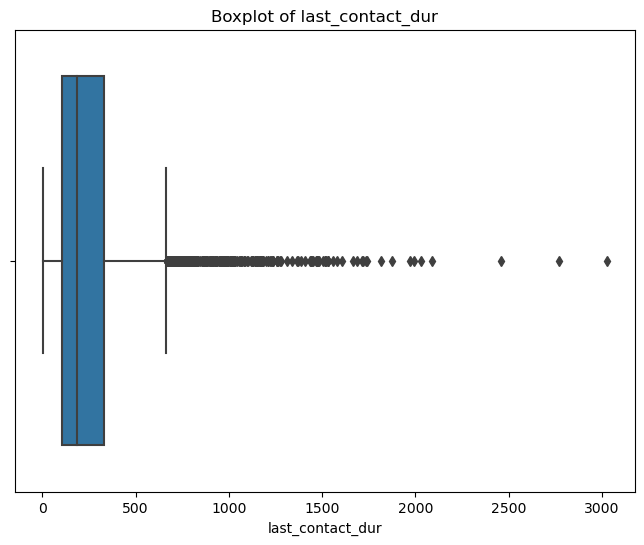

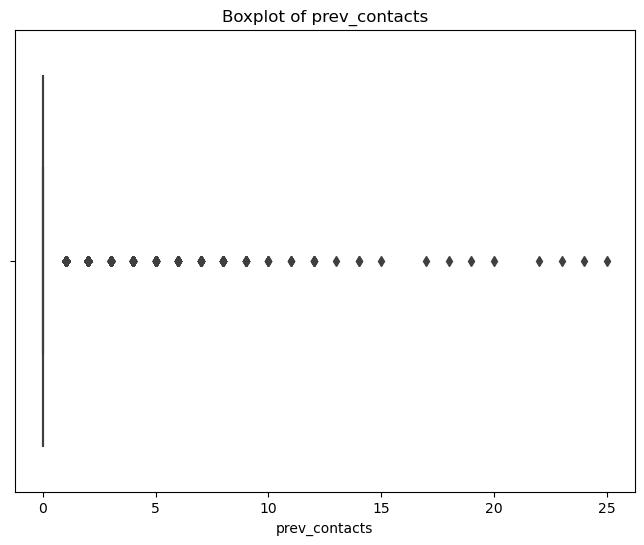

In [49]:
print(df.dtypes)

cont_features = ['age', 'balance', 'last_contact_day', 'last_contact_dur', 'prev_contacts']

for attribute in cont_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[attribute])
    plt.xlabel(attribute)
    plt.title(f'Boxplot of {attribute}')
    plt.show()
